In [1]:
import os
from os.path import expanduser
import socket
import sys
import glob

# BELOW IS SYSTEM/PATH CONFIGURATION #
my_home = expanduser("~")
running_system = socket.gethostname()
# Configure machine's names here #
systemHLRN = 'blogin1'
systemLOCAL = 'Laurents-MacBook-Pro.local'
my_home = expanduser("~")
# Define local pass #
wd_path = '/home/hbkoziel/pyfesom/'
save_path = wd_path+'/figures/Arc12/FINAL/'

#sys.path.append("codes/modules") # add custom Vibe 's modules
#sys.path.append('../..') # add standard 's modules
sys.path.append(wd_path)
#########################################

In [2]:
import pyfesom as pf
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.basemap import Basemap
import numpy as np
from netCDF4 import Dataset
import os
import time

import xarray as xr
import pandas as pd

sys.path.append('/home/hbkoziel/pyfesom/pyfesom/cmocean/')
import cmocean as cmap

No joblib
no cmocean


In [3]:
df_eu_mo = pd.read_pickle(wd_path+'codes/sertemp/Eurasian_basin_monthly')
df_am_mo = pd.read_pickle(wd_path+'codes/sertemp/Amerasian_basin_monthly')

# Fix bad last values
df_eu_mo['vnf']['2015-12-01'] = 0.72
df_eu_mo['w']['2015-12-01'] = 0.26

KeyError: 'vnf'

In [ ]:
df_eu_evnf = pd.read_pickle(wd_path+'codes/sertemp/Eurasian_basin_EVNF')
df_am_evnf = pd.read_pickle(wd_path+'codes/sertemp/Amerasian_basin_EVNF')

In [ ]:
df_eu_mar = df_eu_mo[df_eu_mo.index.month == 3]
df_am_mar = df_am_mo[df_am_mo.index.month == 3]

df_eu_sept = df_eu_mo[df_eu_mo.index.month == 9]
df_am_sept = df_am_mo[df_am_mo.index.month == 9]

df_eu_yearlymean = df_eu_mo.resample('YS').mean()
df_am_yearlymean = df_am_mo.resample('YS').mean()

df_eu_yearlystd = df_eu_mo.resample('YS').std()
df_am_yearlystd = df_am_mo.resample('YS').std()

df_eu_mar_evnf = df_eu_evnf[df_eu_evnf.index.month == 3]
df_am_mar_evnf = df_am_evnf[df_am_evnf.index.month == 3]

df_eu_sept_evnf = df_eu_evnf[df_eu_evnf.index.month == 9]
df_am_sept_evnf = df_am_evnf[df_am_evnf.index.month == 9]

df_eu_yearlymean_evnf = df_eu_evnf.resample('YS').mean()
df_am_yearlymean_evnf = df_am_evnf.resample('YS').mean()

df_eu_yearlystd_evnf = df_eu_evnf.resample('YS').std()
df_am_yearlystd_evnf = df_am_evnf.resample('YS').std()

In [4]:
df_eu_mo.head()

,DINsurf,ZB,MLD,cur100m,w100m,EKE,NPP,SIC,PARmld,PARsurf,DINmld
time,,,,,,,,,,,
1985-01-01,5.025528,3.278447e-11,64.188072,2.620109,-7.510845e-08,5.846319,-0.000016,0.994956,2.229998e-16,2.229998e-16,5.039362
1985-02-01,5.092289,6.689933e-13,67.928421,2.622041,1.106660e-07,4.867825,-0.000011,0.996346,2.229998e-16,2.229998e-16,5.110126
1985-03-01,5.168523,1.051664e-14,70.067337,2.609800,4.076526e-10,4.088163,-0.000008,0.995719,9.207071e-03,2.604991e-02,5.184600
1985-04-01,5.202338,1.559266e-16,71.895973,2.574523,-3.426388e-08,2.664871,0.000004,0.997732,1.374531e-01,4.279602e-01,5.222831
1985-05-01,5.194927,4.732651e-18,68.795609,2.659457,2.407244e-08,1.602739,0.000025,0.995824,2.004698e-01,5.604603e-01,5.221122


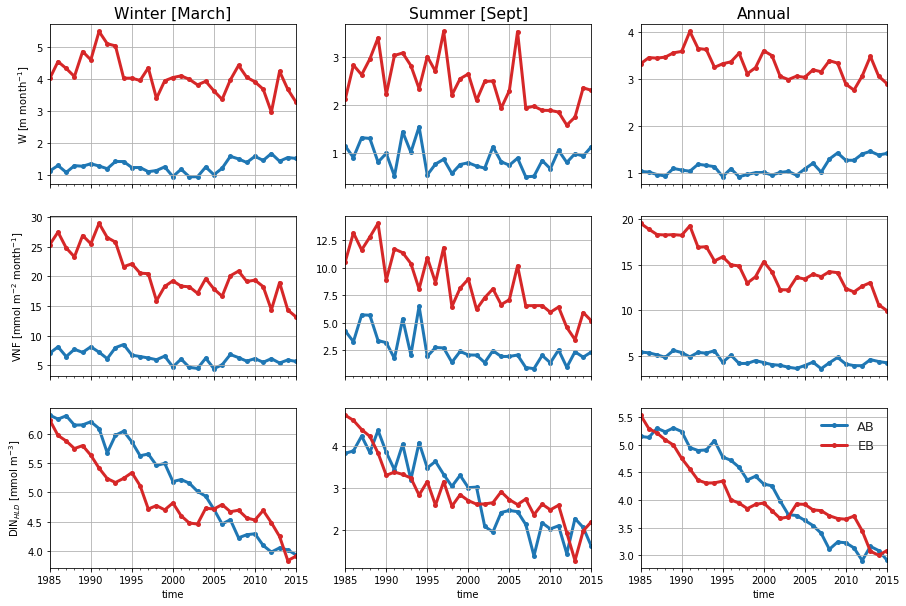

In [7]:
figsize = (15, 10)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=figsize, constrained_layout=False, sharex=True)#sharey='row'

plt.style.use('seaborn')
plt.style.use('seaborn-talk')

df_am_mar['wp'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax1, legend = False, color = 'tab:blue', zorder =1)
df_eu_mar['wp'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax1, legend = False, color = 'tab:red', zorder =2)
ax1.set_title('Winter [March]')
ax1.set_ylabel('W [m month$^{-1}$]')

df_am_mar['vnfp'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax4, legend = False, color = 'tab:blue', zorder =1)
df_eu_mar['vnfp'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax4, legend = False, color = 'tab:red', zorder =2)
ax4.set_ylabel('VNF [mmol m$^{-2}$ month$^{-1}$]')

df_am_mar['DINhld'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax7, legend = False, color = 'tab:blue', zorder =1)
df_eu_mar['DINhld'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax7, legend = False, color = 'tab:red', zorder =2)
ax7.set_ylabel('DIN$_{HLD}$ [mmol m$^{-3}$]')

df_am_sept['wp'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = False, color = 'tab:blue', zorder =1)
df_eu_sept['wp'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = False, color = 'tab:red', zorder =2)
ax2.set_title('Summer [Sept]')

df_am_sept['vnfp'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax5, legend = False, color = 'tab:blue', zorder =1)
df_eu_sept['vnfp'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax5, legend = False, color = 'tab:red', zorder =2)

df_am_sept['DINhld'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax8, legend = False, color = 'tab:blue', zorder =1)
df_eu_sept['DINhld'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax8, legend = False, color = 'tab:red', zorder =2)

df_am_yearlymean['wp'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax3, legend = False, color = 'tab:blue', zorder =1)
df_eu_yearlymean['wp'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax3, legend = False, color = 'tab:red', zorder =2)
ax3.set_title('Annual')

df_am_yearlymean['vnfp'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax6, legend = False, color = 'tab:blue', zorder =1)
df_eu_yearlymean['vnfp'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax6, legend = False, color = 'tab:red', zorder =2)

df_am_yearlymean['DINhld'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax9, legend = False, color = 'tab:blue', zorder =1)
df_eu_yearlymean['DINhld'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax9, legend = False, color = 'tab:red', zorder =2)



plt.legend({'EB','AB'})
# df3_yearly_am.plot(kind = 'line',style='.-',markersize = 20, lw = 5, ax = ax2)
# plt.ylabel('area [m$^{2}$]')
# plt.title('Arctic Amerasian basin')

#plt.savefig(save_path+'FIG9.png', dpi = 300, bbox_inches='tight') 

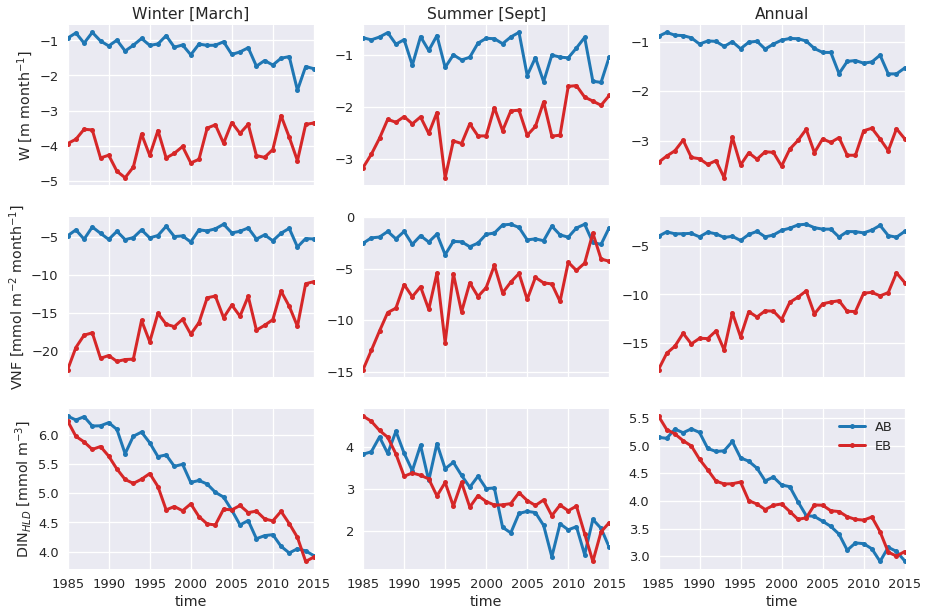

In [8]:
figsize = (15, 10)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=figsize, constrained_layout=False, sharex=True)#sharey='row'

plt.style.use('seaborn')
plt.style.use('seaborn-talk')

df_am_mar['wn'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax1, legend = False, color = 'tab:blue', zorder =1)
df_eu_mar['wn'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax1, legend = False, color = 'tab:red', zorder =2)
ax1.set_title('Winter [March]')
ax1.set_ylabel('W [m month$^{-1}$]')

df_am_mar['vnfn'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax4, legend = False, color = 'tab:blue', zorder =1)
df_eu_mar['vnfn'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax4, legend = False, color = 'tab:red', zorder =2)
ax4.set_ylabel('VNF [mmol m$^{-2}$ month$^{-1}$]')

df_am_mar['DINhld'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax7, legend = False, color = 'tab:blue', zorder =1)
df_eu_mar['DINhld'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax7, legend = False, color = 'tab:red', zorder =2)
ax7.set_ylabel('DIN$_{HLD}$ [mmol m$^{-3}$]')

df_am_sept['wn'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = False, color = 'tab:blue', zorder =1)
df_eu_sept['wn'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = False, color = 'tab:red', zorder =2)
ax2.set_title('Summer [Sept]')

df_am_sept['vnfn'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax5, legend = False, color = 'tab:blue', zorder =1)
df_eu_sept['vnfn'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax5, legend = False, color = 'tab:red', zorder =2)

df_am_sept['DINhld'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax8, legend = False, color = 'tab:blue', zorder =1)
df_eu_sept['DINhld'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax8, legend = False, color = 'tab:red', zorder =2)

df_am_yearlymean['wn'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax3, legend = False, color = 'tab:blue', zorder =1)
df_eu_yearlymean['wn'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax3, legend = False, color = 'tab:red', zorder =2)
ax3.set_title('Annual')

df_am_yearlymean['vnfn'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax6, legend = False, color = 'tab:blue', zorder =1)
df_eu_yearlymean['vnfn'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax6, legend = False, color = 'tab:red', zorder =2)

df_am_yearlymean['DINhld'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax9, legend = False, color = 'tab:blue', zorder =1)
df_eu_yearlymean['DINhld'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax9, legend = False, color = 'tab:red', zorder =2)



plt.legend({'EB','AB'})
# df3_yearly_am.plot(kind = 'line',style='.-',markersize = 20, lw = 5, ax = ax2)
# plt.ylabel('area [m$^{2}$]')
# plt.title('Arctic Amerasian basin')

#plt.savefig(save_path+'FIG9.png', dpi = 300, bbox_inches='tight') 

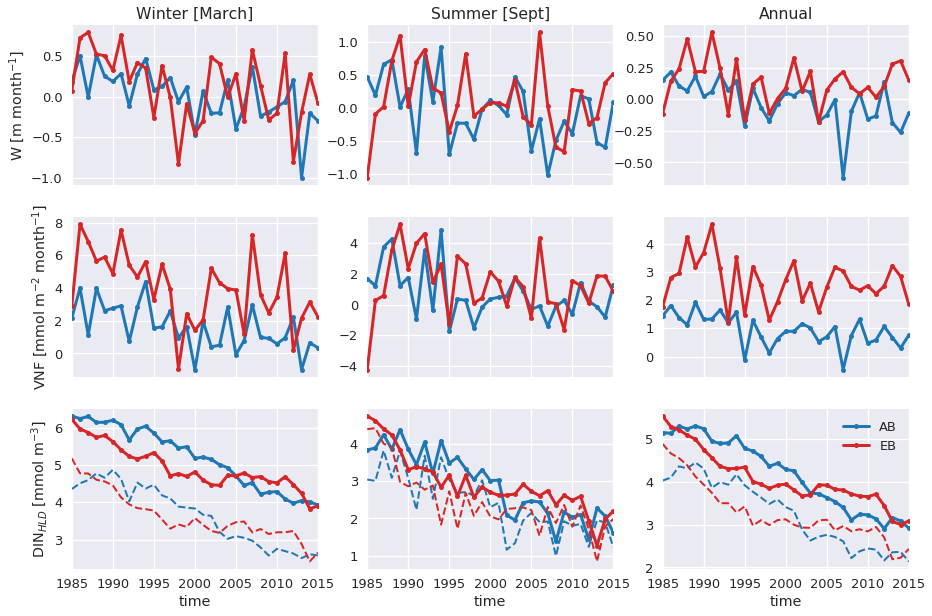

In [9]:
figsize = (15, 10)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=figsize, constrained_layout=False, sharex=True)#sharey='row'

plt.style.use('seaborn')
plt.style.use('seaborn-talk')

df_am_mar['w'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax1, legend = False, color = 'tab:blue', zorder =1)
df_eu_mar['w'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax1, legend = False, color = 'tab:red', zorder =2)
ax1.set_title('Winter [March]')
ax1.set_ylabel('W [m month$^{-1}$]')

df_am_mar['vnf'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax4, legend = False, color = 'tab:blue', zorder =1)
df_eu_mar['vnf'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax4, legend = False, color = 'tab:red', zorder =2)
ax4.set_ylabel('VNF [mmol m$^{-2}$ month$^{-1}$]')

df_am_mar['DINhld'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax7, legend = False, color = 'tab:blue', zorder =1)
df_eu_mar['DINhld'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax7, legend = False, color = 'tab:red', zorder =2)

df_am_mar['DINmld'].plot(kind = 'line',style='--',markersize = 10, lw = 2, ax = ax7, legend = False, color = 'tab:blue', zorder =1)
df_eu_mar['DINmld'].plot(kind = 'line',style='--',markersize = 10, lw = 2, ax = ax7, legend = False, color = 'tab:red', zorder =2)

ax7.set_ylabel('DIN$_{HLD}$ [mmol m$^{-3}$]')

df_am_sept['w'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = False, color = 'tab:blue', zorder =1)
df_eu_sept['w'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = False, color = 'tab:red', zorder =2)
ax2.set_title('Summer [Sept]')

df_am_sept['vnf'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax5, legend = False, color = 'tab:blue', zorder =1)
df_eu_sept['vnf'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax5, legend = False, color = 'tab:red', zorder =2)

df_am_sept['DINhld'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax8, legend = False, color = 'tab:blue', zorder =1)
df_eu_sept['DINhld'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax8, legend = False, color = 'tab:red', zorder =2)

df_am_sept['DINsurf'].plot(kind = 'line',style='--',markersize = 10, lw = 2, ax = ax8, legend = False, color = 'tab:blue', zorder =1)
df_eu_sept['DINsurf'].plot(kind = 'line',style='--',markersize = 10, lw = 2, ax = ax8, legend = False, color = 'tab:red', zorder =2)

df_am_yearlymean['w'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax3, legend = False, color = 'tab:blue', zorder =1)
df_eu_yearlymean['w'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax3, legend = False, color = 'tab:red', zorder =2)
ax3.set_title('Annual')

df_am_yearlymean['vnf'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax6, legend = False, color = 'tab:blue', zorder =1)
df_eu_yearlymean['vnf'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax6, legend = False, color = 'tab:red', zorder =2)

df_am_yearlymean['DINhld'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax9, legend = False, color = 'tab:blue', zorder =1)
df_eu_yearlymean['DINhld'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax9, legend = False, color = 'tab:red', zorder =2)

df_am_yearlymean['DINmld'].plot(kind = 'line',style='--',markersize = 10, lw = 2, ax = ax9, legend = False, color = 'tab:blue', zorder =1)
df_eu_yearlymean['DINmld'].plot(kind = 'line',style='--',markersize = 10, lw = 2, ax = ax9, legend = False, color = 'tab:red', zorder =2)



plt.legend({'EB','AB'})
# df3_yearly_am.plot(kind = 'line',style='.-',markersize = 20, lw = 5, ax = ax2)
# plt.ylabel('area [m$^{2}$]')
# plt.title('Arctic Amerasian basin')

#plt.savefig(save_path+'FIG9.png', dpi = 300, bbox_inches='tight') 

In [10]:
first_year = 1985
last_year  = 2015
x      = np.arange(first_year,last_year+1,1)
years = x

In [11]:
# figsize = (10, 5)
# fig, ax = plt.subplots(1, 1, figsize=figsize, constrained_layout=False, sharex=True)#sharey='row'

# df_am_yearlymean_evnf.plot(ax = ax, kind = 'line',style='.-',markersize = 10, lw = 3, legend = False, color = 'tab:blue', zorder =1)
# df_eu_yearlymean_evnf.plot(ax = ax, kind = 'line',style='.-',markersize = 10, lw = 3, legend = False, color = 'tab:red', zorder =2)
# plt.legend({'AB','EB'})
# ax.set_title('Annual')
# ax.set_ylabel('E-VNF [mmol m$^{-2}$ month$^{-1}$]')

In [12]:
# figsize = (10, 5)
# fig, ax = plt.subplots(1, 1, figsize=figsize, constrained_layout=False, sharex=True)#sharey='row'

# df_am_yearlystd_evnf.plot(ax = ax, kind = 'line',style='.-',markersize = 10, lw = 3, legend = False, color = 'tab:blue', zorder =1)
# df_eu_yearlystd_evnf.plot(ax = ax, kind = 'line',style='.-',markersize = 10, lw = 3, legend = False, color = 'tab:red', zorder =2)
# plt.legend({'AB','EB'})
# ax.set_title('Annual')
# ax.set_ylabel('E-VNF [mmol m$^{-2}$ month$^{-1}$]')

Text(0.5,1,'Annual - Downward')

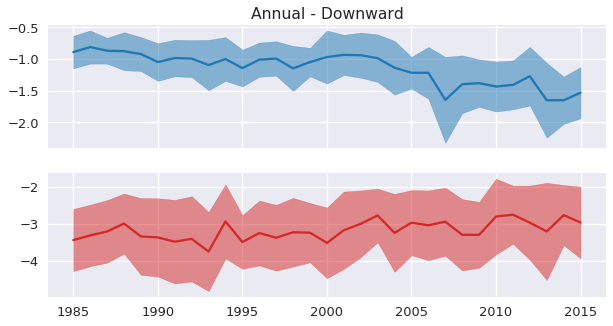

In [13]:
figsize = (10, 5)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=figsize, constrained_layout=False, sharex=True)#sharey='row'

ax1.plot(x,df_am_yearlymean['wn'], color='tab:blue')
ax2.plot(x,df_eu_yearlymean['wn'], color='tab:red')
# ax1.fill_between(x,df_am_yearlymean['wn'], df_am_yearlymean['wp'], color='tab:blue', alpha=.5)
# ax2.fill_between(x,df_eu_yearlymean['wn'], df_eu_yearlymean['wp'], color='tab:red', alpha=.5)
ax1.fill_between(x,df_am_yearlymean['wn']-df_am_yearlystd['wn'], df_am_yearlymean['wn']+df_am_yearlystd['wn'], color='tab:blue', alpha=.5)
ax2.fill_between(x,df_eu_yearlymean['wn']-df_eu_yearlystd['wn'], df_eu_yearlymean['wn']+df_eu_yearlystd['wn'], color='tab:red', alpha=.5)

#plt.legend({'AB','EB'})
ax1.set_title('Annual - Downward')

Text(0.5,1,'Annual - Upward')

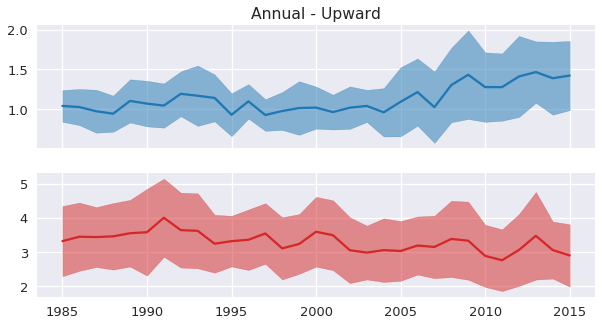

In [14]:
figsize = (10, 5)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=figsize, constrained_layout=False, sharex=True)#sharey='row'

ax1.plot(x,df_am_yearlymean['wp'], color='tab:blue')
ax2.plot(x,df_eu_yearlymean['wp'], color='tab:red')
# ax1.fill_between(x,df_am_yearlymean['wn'], df_am_yearlymean['wp'], color='tab:blue', alpha=.5)
# ax2.fill_between(x,df_eu_yearlymean['wn'], df_eu_yearlymean['wp'], color='tab:red', alpha=.5)
ax1.fill_between(x,df_am_yearlymean['wp']-df_am_yearlystd['wp'], df_am_yearlymean['wp']+df_am_yearlystd['wp'], color='tab:blue', alpha=.5)
ax2.fill_between(x,df_eu_yearlymean['wp']-df_eu_yearlystd['wp'], df_eu_yearlymean['wp']+df_eu_yearlystd['wp'], color='tab:red', alpha=.5)

#plt.legend({'AB','EB'})
ax1.set_title('Annual - Upward')

Text(0.5,1,'Annual - Net')

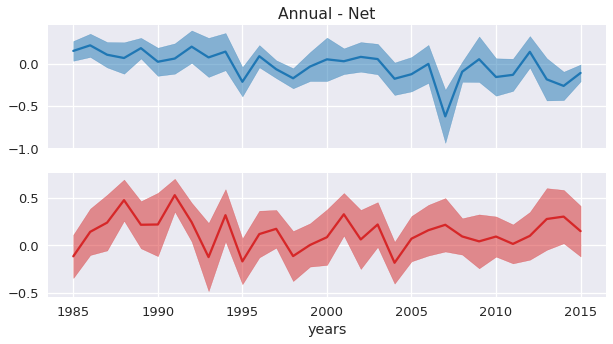

In [15]:
figsize = (10, 5)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=figsize, constrained_layout=False, sharex=True)#sharey='row'

ax1.plot(x,df_am_yearlymean['w'], color='tab:blue')
ax2.plot(x,df_eu_yearlymean['w'], color='tab:red')
# ax1.fill_between(x,df_am_yearlymean['wn'], df_am_yearlymean['wp'], color='tab:blue', alpha=.5)
# ax2.fill_between(x,df_eu_yearlymean['wn'], df_eu_yearlymean['wp'], color='tab:red', alpha=.5)
ax1.fill_between(x,df_am_yearlymean['w']-df_am_yearlystd['w']/2, df_am_yearlymean['w']+df_am_yearlystd['w']/2, color='tab:blue', alpha=.5)
ax2.fill_between(x,df_eu_yearlymean['w']-df_eu_yearlystd['w']/2, df_eu_yearlymean['w']+df_eu_yearlystd['w']/2, color='tab:red', alpha=.5)

ax2.set_xlabel('years')
#ax2.set_ylabel('VNF [mmol m$^{-2}$ month$^{-1}$]')
#plt.legend({'AB','EB'})
ax1.set_title('Annual - Net')

Text(0.8,0.75,'p$_{val}$ = 0.32')

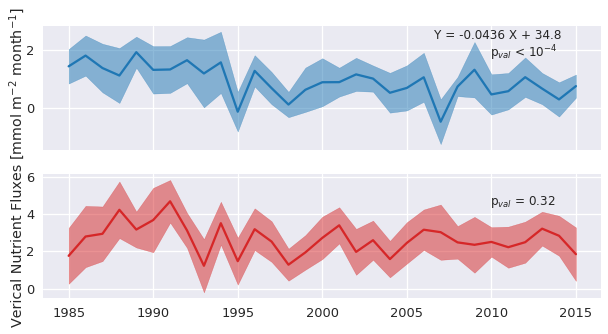

In [16]:
figsize = (10, 5)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=figsize, constrained_layout=False, sharex=True)#sharey='row'

ax1.plot(x,df_am_yearlymean['vnf'], color='tab:blue')
ax2.plot(x,df_eu_yearlymean['vnf'], color='tab:red')
# ax1.fill_between(x,df_am_yearlymean['wn'], df_am_yearlymean['wp'], color='tab:blue', alpha=.5)
# ax2.fill_between(x,df_eu_yearlymean['wn'], df_eu_yearlymean['wp'], color='tab:red', alpha=.5)
ax1.fill_between(x,df_am_yearlymean['vnf']-df_am_yearlystd['vnf']/2, df_am_yearlymean['vnf']+df_am_yearlystd['vnf']/2, color='tab:blue', alpha=.5)
ax2.fill_between(x,df_eu_yearlymean['vnf']-df_eu_yearlystd['vnf']/2, df_eu_yearlymean['vnf']+df_eu_yearlystd['vnf']/2, color='tab:red', alpha=.5)

ax2.set_ylabel('Verical Nutrient Fluxes    ', verticalalignment='baseline', rotation_mode="anchor")
ax1.set_ylabel('  [mmol m$^{-2}$ month$^{-1}$]', verticalalignment='baseline', rotation_mode="anchor")

ax1.annotate('Y = -0.0436 X + 34.8', xy=(0.7, 0.9), xycoords='axes fraction', fontsize = 12)
ax1.annotate('p$_{val}$ < 10$^{-4}$', xy=(0.8, 0.75), xycoords='axes fraction', fontsize = 12)

ax2.annotate('p$_{val}$ = 0.32', xy=(0.8, 0.75), xycoords='axes fraction', fontsize = 12)
# plt.text(1.02,.8, "Y = -0.0436 x X + 34.8", color = 'k')
# plt.text(1.02,.7, "p_{val} < 10${-4}$", color = 'k')

#plt.legend({'AB','EB'})
#ax1.set_title('Annual - Net')

In [17]:
df_eu_yr = pd.read_pickle(wd_path+'codes/sertemp/Eurasian_basin_yearly')
df_am_yr = pd.read_pickle(wd_path+'codes/sertemp/Amerasian_basin_yearly')

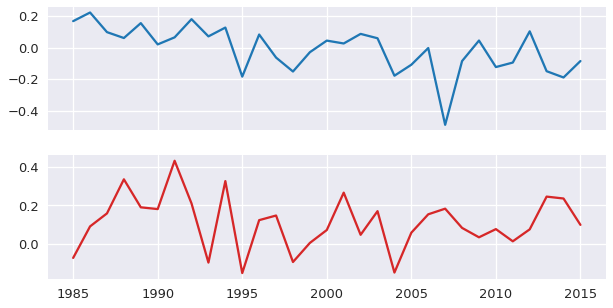

In [18]:
figsize = (10, 5)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=figsize, constrained_layout=False, sharex=True)#sharey='row'

ax1.plot(x,df_am_yearlymean['w']*(df_am_yearlymean['DINhld']-df_am_yearlymean['DINmld']), color='tab:blue')
ax2.plot(x,df_eu_yearlymean['w']*(df_eu_yearlymean['DINhld']-df_eu_yearlymean['DINmld']), color='tab:red')
# ax1.fill_between(x,df_am_yearlymean['vnfn'], df_am_yearlymean['vnfp'], color='tab:blue', alpha=.5)
# ax2.fill_between(x,df_eu_yearlymean['vnfn'], df_eu_yearlymean['vnfp'], color='tab:red', alpha=.5)

In [19]:
df_am_yr.head()

,ANPP,WAPE,WHLD,SAPE,SHLD
time,,,,,
1985-01-01,5.605971,402048.778891,209.100126,571561.243736,278.804377
1986-01-01,9.263030,395659.384928,209.018413,543487.783912,268.996799
1987-01-01,6.946334,369272.454284,201.205318,549668.015782,276.880913
1988-01-01,10.944166,384411.185165,202.911512,564969.494504,280.504065
1989-01-01,6.487105,456240.982973,233.807897,567461.164222,281.963118


In [20]:
df_am_yearlymean.head()

,DINsurf,ZB,MLD,cur50m,w,wp,wn,wp_area,wn_area,DINhld,vnf,vnfp,vnfn,EKE,NPP,SIC,PARmld,PARsurf,NNA,DINmld
time,,,,,,,,,,,,,,,,,,,,
1985-01-01,4.000750,3.566838e-07,34.896274,2.612038,0.149605,1.041903,-0.892298,1.289264e+12,1.155606e+12,5.149154,1.439109,5.421318,-3.982209,5.780794,0.529129,0.960554,3.755326,4.154662,0.077335,4.028311
1986-01-01,4.069721,5.782032e-06,34.067679,2.552715,0.214832,1.027805,-0.812973,1.343422e+12,1.101448e+12,5.131211,1.807724,5.340457,-3.532733,5.952678,0.874308,0.955471,4.028428,4.431541,0.090061,4.096245
1987-01-01,4.336093,2.773027e-06,34.515760,2.567926,0.104460,0.975127,-0.870667,1.239187e+12,1.205683e+12,5.297781,1.380429,5.112849,-3.732419,5.511925,0.655642,0.963635,3.789162,4.082628,0.057475,4.359525
1988-01-01,4.293364,3.636064e-07,34.230625,2.625938,0.065902,0.944107,-0.878205,1.242259e+12,1.202612e+12,5.232515,1.123605,4.849681,-3.726076,6.967641,1.032986,0.955013,4.190541,4.601372,0.110708,4.311277
1989-01-01,4.435166,2.628656e-06,34.224831,2.197442,0.181675,1.105038,-0.923363,1.392712e+12,1.052158e+12,5.302527,1.924854,5.609607,-3.684753,7.657910,0.612297,0.960754,3.077120,3.406331,0.058357,4.449055


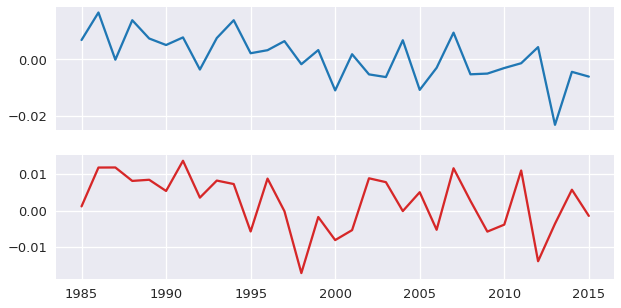

In [21]:
figsize = (10, 5)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=figsize, constrained_layout=False, sharex=True)#sharey='row'

ax1.plot(x,-df_am_mar['w']*(df_am_mar['DINmld']-df_am_mar['DINhld'])/df_am_mar['MLD'], color='tab:blue')
ax2.plot(x,-df_eu_mar['w']*(df_eu_mar['DINmld']-df_eu_mar['DINhld'])/df_eu_mar['MLD'], color='tab:red')
# ax1.fill_between(x,df_am_yearlymean['vnfn'], df_am_yearlymean['vnfp'], color='tab:blue', alpha=.5)
# ax2.fill_between(x,df_eu_yearlymean['vnfn'], df_eu_yearlymean['vnfp'], color='tab:red', alpha=.5)

In [22]:
from utils import linregsum

In [23]:
y = df_eu_yearlymean['vnf']
print np.nanmean(y)
smry = linregsum(x, y)

2.663001468784331
                            OLS Regression Results                            
Dep. Variable:                    vnf   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     1.660
Date:                Sat, 23 Jan 2021   Prob (F-statistic):              0.208
Time:                        23:03:17   Log-Likelihood:                -36.275
No. Observations:                  31   AIC:                             76.55
Df Residuals:                      29   BIC:                             79.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.3721     32.377  

In [24]:
y = df_am_yearlymean['vnf']
print np.nanmean(y)
print np.nanmean(y[0:14])
print np.nanmean(y[15:-1])
first_year = 1985
last_year  = 2015
x      = np.arange(first_year,last_year+1,1)
smry = linregsum(x, y)

0.9384427622252774
1.1947233362064502
0.7314154195833077
                            OLS Regression Results                            
Dep. Variable:                    vnf   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     12.77
Date:                Sat, 23 Jan 2021   Prob (F-statistic):            0.00125
Time:                        23:03:17   Log-Likelihood:                -18.881
No. Observations:                  31   AIC:                             41.76
Df Residuals:                      29   BIC:                             44.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [25]:
y = df_eu_yearlymean['vnfn']/(df_eu_yearlystd['vnfn'])
print np.nanmean(y)
smry = linregsum(x[13:], y[13:])

-2.7386952214212053
                            OLS Regression Results                            
Dep. Variable:                   vnfn   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     2.487
Date:                Sat, 23 Jan 2021   Prob (F-statistic):              0.134
Time:                        23:03:17   Log-Likelihood:                -6.4527
No. Observations:                  18   AIC:                             16.91
Df Residuals:                      16   BIC:                             18.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -55.4200     33.483

/sw/tools/anaconda2/2019.10/skl/lib/python2.7/site-packages/scipy/stats/stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


For depth 50 model level 50.0 will be used


Text(0.5,1,'S')

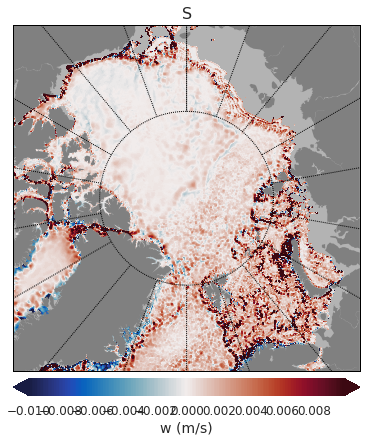

For depth 50 model level 50.0 will be used


Text(0.5,1,'S')

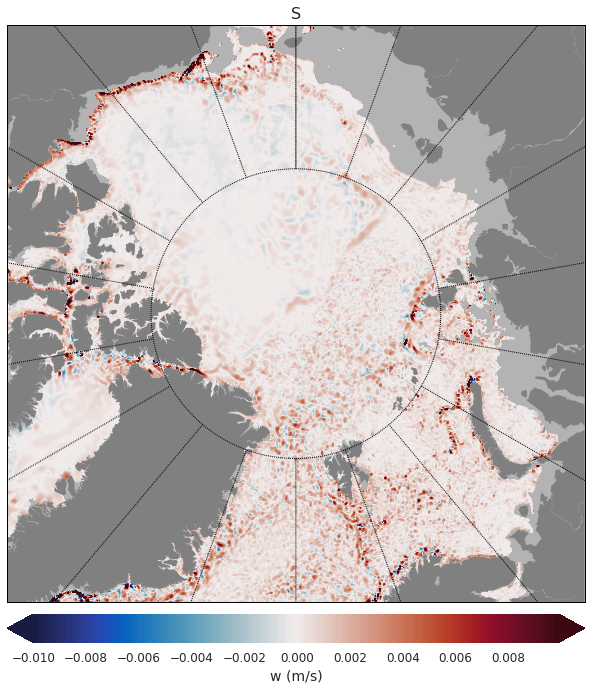